In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math as mymath
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/car_age_price.csv"

In [3]:
data = pd.read_csv(file) #reading file

In [4]:
data.info

<bound method DataFrame.info of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [4]:
print(data)

     Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]


In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [11]:
corrmatrix=data.corr()

In [12]:
corrmatrix

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [13]:
from scipy import stats
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [14]:
y= data['Price']
X= data.drop('Price', axis=1)

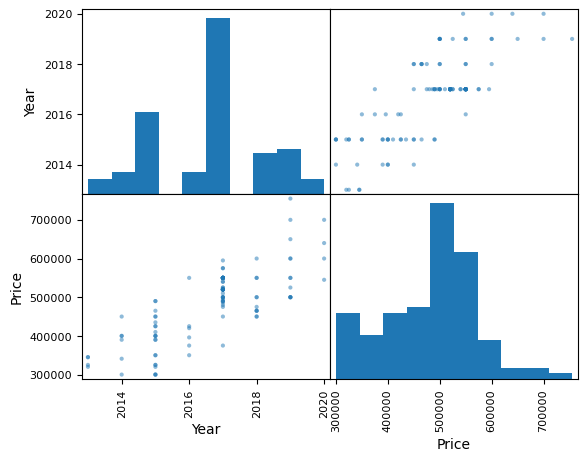

In [15]:
scatter_matrix(data)
plt.show()

In [54]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [50]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [17]:
X

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, 
                                                  random_state=42)

In [29]:
lr= LinearRegression()
mymodel= lr.fit(X_train, y_train)
y_pred= mymodel.predict(X_test)

In [47]:
y_pred

array([600775.81201603, 505558.75884159, 553167.28542881, 553167.28542881,
       553167.28542881, 410341.70566715, 505558.75884159, 553167.28542881,
       600775.81201603, 600775.81201603, 315124.65249272, 505558.75884159,
       410341.70566715, 648384.33860324, 553167.28542881, 600775.81201603,
       315124.65249272, 410341.70566715, 505558.75884159, 505558.75884159,
       505558.75884159, 505558.75884159, 505558.75884159])

In [31]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [38]:
print('MSE is: ', mean_squared_error(y_test, y_pred))
print('R squared value is:', r2_score(y_test, y_pred))

MSE is:  4326906256.829671
R squared value is: 0.36759313425902185


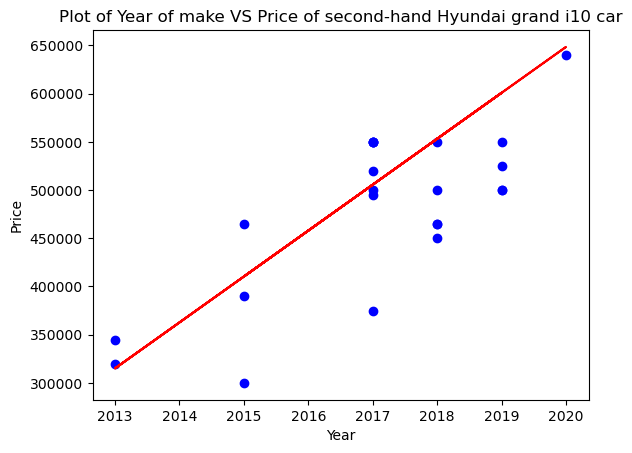

In [42]:
#Fitted regression line
plt.scatter( X_test, y_test, color = 'blue' )

plt.plot( X_test, y_pred, color = 'red' )

plt.title( '''Plot of Year of make VS Price of second-hand Hyundai grand i10 car''' )

plt.xlabel( 'Year' )

plt.ylabel( 'Price' )

plt.show()


In [44]:
# predicted price of 2022 car
predicted_price = model.predict(np.array([[2022]]))
print('Predicted price at 2022:', predicted_price)

Predicted price at 2022: [743601.61594504]


C:\Users\ppbin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
# Residual Analysis
res = y_test - y_pred
res

40     -75775.812016
65     -10558.758842
4      -88167.285429
47    -103167.285429
42      -3167.285429
69    -110341.705667
26      44441.241158
11     -53167.285429
10    -100775.812016
44     -50775.812016
73       4875.347507
55      44441.241158
68      54658.294333
97      -8384.338603
0      -88167.285429
18    -100775.812016
53      29875.347507
80     -20341.705667
103   -130558.758842
91      14441.241158
36      44441.241158
12      -5558.758842
31      44441.241158
Name: Price, dtype: float64

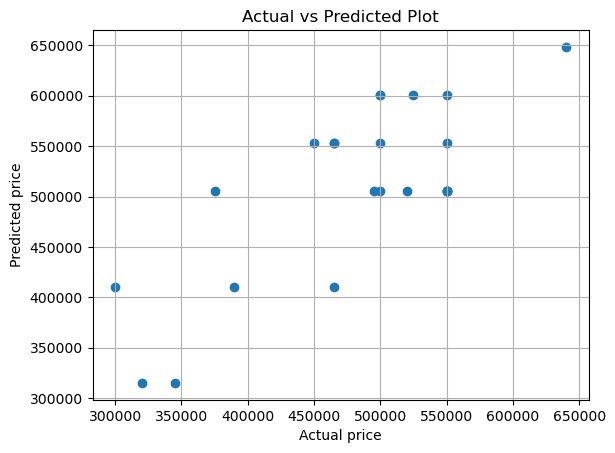

In [56]:
#Residual Analysis – Actual Vs Predicted Plot
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Plot")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.grid()
plt.show()

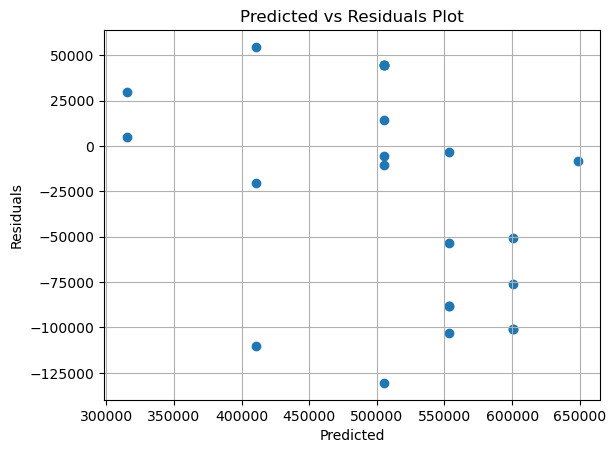

In [54]:
#Residual Analysis – Predicted Vs Residuals Plot
plt.scatter(y_pred, res)
plt.title("Predicted vs Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid()
plt.show()

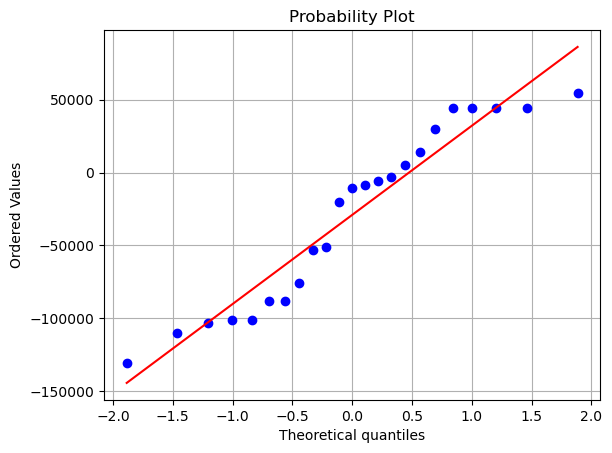

In [57]:
#Residual Analysis: Normality test
norm_test = stats.normaltest(res)
w = norm_test[0]
p_value = norm_test[1]
stats.probplot(res, plot= plt)
plt.grid()
plt.show()

In [58]:
stats.mstats.normaltest(res)

NormaltestResult(statistic=7.364968049766578, pvalue=0.025160398091377215)

In [45]:
#Lasso Regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
model= lasso.fit(X_train, y_train)

# Predicting on the test set, can replace model with lasso itself
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R_squared:", r2)

Mean Squared Error: 4326901608.19506
R_squared: 0.36759381368868127


In [39]:
# alternative method

In [32]:
mymodel = mymodel.fit(X,y)
mymodel

LinearRegression()

In [33]:
mymodel.coef_

array([43453.37988793])

In [34]:
# Model accuracy
rsq = mymodel.score(X,y)
rsq

0.6026450104600283

In [35]:
mymodel.intercept_

-87147246.05488418

In [36]:
predicted_model=mymodel.coef_*X+mymodel.intercept_


In [37]:
# predicted price of a 2022 model second-hand grand i10
predicted_value=mymodel.coef_*2022+mymodel.intercept_
predicted_value

array([715488.07850976])

In [86]:
pred = mymodel.predict(X)
pred

array([541674.55895805, 585127.93884598, 585127.93884598, 541674.55895805,
       541674.55895805, 411314.41929425, 454767.79918219, 498221.17907012,
       498221.17907012, 498221.17907012, 585127.93884598, 541674.55895805,
       498221.17907012, 585127.93884598, 498221.17907012, 498221.17907012,
       498221.17907012, 498221.17907012, 585127.93884598, 498221.17907012,
       541674.55895805, 585127.93884598, 411314.41929425, 498221.17907012,
       498221.17907012, 498221.17907012, 498221.17907012, 498221.17907012,
       498221.17907012, 498221.17907012, 585127.93884598, 498221.17907012,
       498221.17907012, 498221.17907012, 498221.17907012, 498221.17907012,
       498221.17907012, 498221.17907012, 541674.55895805, 628581.3187339 ,
       585127.93884598, 585127.93884598, 541674.55895805, 585127.93884598,
       585127.93884598, 541674.55895805, 585127.93884598, 541674.55895805,
       454767.79918219, 541674.55895805, 324407.65951841, 541674.55895805,
       324407.65951841, 3

In [88]:
mse = mean_squared_error(y, pred)
mse

3276721166.5638003

In [89]:
# Residual Analysis
res = y-pred
res

array([ -76674.55895805,  169872.06115402,  114872.06115402,
        -76674.55895805,  -76674.55895805,  -61314.41929425,
        -29767.79918219,   76778.82092988,   11777.82092988,
         76778.82092988,  -85127.93884598,  -41674.55895805,
          1778.82092988,   14872.06115402,  -23221.17907012,
          1778.82092988,    1778.82092988,   51778.82092988,
        -85127.93884598,    1778.82092988,  -41674.55895805,
        -85127.93884598,   23684.58070575,   51778.82092988,
         51778.82092988,   51778.82092988,   51778.82092988,
         51778.82092988,   51778.82092988,   51778.82092988,
         64872.06115402,   51778.82092988,   51778.82092988,
         51778.82092988,  -48221.17907012,   51778.82092988,
         51778.82092988,  -12221.17907012,  -66674.55895805,
        -83581.3187339 ,  -60127.93884598,   14872.06115402,
          8325.44104195,  -35127.93884598,  -35127.93884598,
        -91674.55895805,  -85127.93884598,  -91674.55895805,
        -58767.79918219,

In [90]:
pred=pd.DataFrame(pred,columns=['Predicted'])

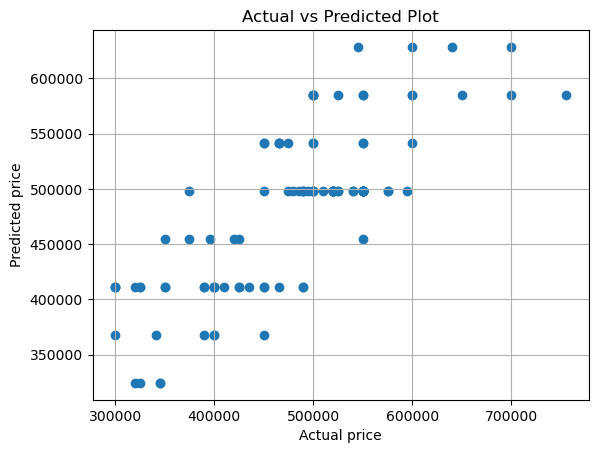

In [91]:
#Residual Analysis – Actual Vs Predicted Plot
plt.scatter(y, pred)
plt.title("Actual vs Predicted Plot")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.grid()
plt.show()

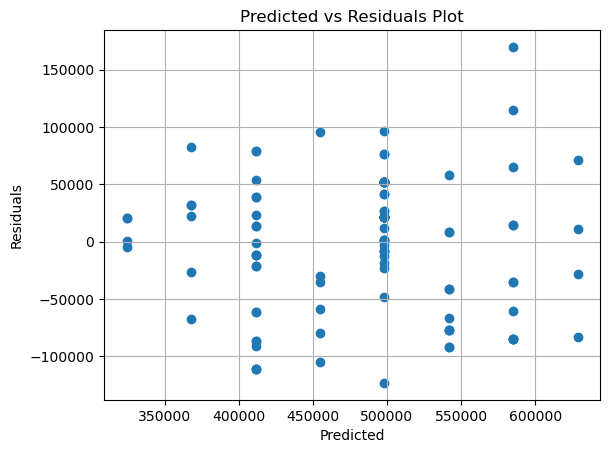

In [92]:
#Residual Analysis – Predicted Vs Residuals Plot
plt.scatter(pred, res)
plt.title("Predicted vs Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid()
plt.show()

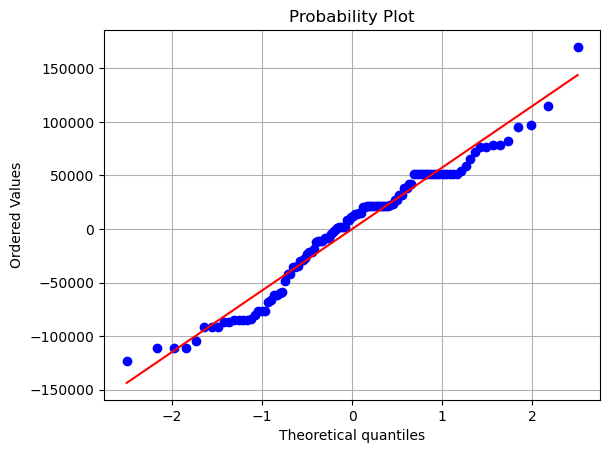

In [93]:
#Residual Analysis: Normality test
norm_test = stats.normaltest(res)
w = norm_test[0]
p_value = norm_test[1]
stats.probplot(res, plot= plt)
plt.grid()
plt.show()

In [36]:
# alternative method
mymodel = ols("y ~ X", data).fit()
mymodel

In [37]:
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     166.8
Date:                Sun, 21 May 2023   Prob (F-statistic):           8.76e-24
Time:                        19:34:59   Log-Likelihood:                -1385.9
No. Observations:                 112   AIC:                             2776.
Df Residuals:                     110   BIC:                             2781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.715e+07   6.78e+06    -12.845      0.000   -1.01e+08   -7.37e+07
X           4.345e+04   3364.231     12.916      0.000    3.68e+04    5.01e+04
==============================================================================
Omnibus:                        0.903   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                1.012
Skew:                          -0.163   Prob(JB):                        0.603
Kurtosis:                       2.667   Cond. No.                     2.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
anova_table = anova_lm(mymodel)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,5.565964e+11,5.565964e+11,166.830549,8.760561e-24
Residual,110.0,3.669928e+11,3.336298e+09,NaN,NaN


In [39]:
pred=mymodel.predict()
pred

array([541674.55895802, 585127.93884595, 585127.93884595, 541674.55895802,
       541674.55895802, 411314.41929424, 454767.79918216, 498221.17907009,
       498221.17907009, 498221.17907009, 585127.93884595, 541674.55895802,
       498221.17907009, 585127.93884595, 498221.17907009, 498221.17907009,
       498221.17907009, 498221.17907009, 585127.93884595, 498221.17907009,
       541674.55895802, 585127.93884595, 411314.41929424, 498221.17907009,
       498221.17907009, 498221.17907009, 498221.17907009, 498221.17907009,
       498221.17907009, 498221.17907009, 585127.93884595, 498221.17907009,
       498221.17907009, 498221.17907009, 498221.17907009, 498221.17907009,
       498221.17907009, 498221.17907009, 541674.55895802, 628581.31873387,
       585127.93884595, 585127.93884595, 541674.55895802, 585127.93884595,
       585127.93884595, 541674.55895802, 585127.93884595, 541674.55895802,
       454767.79918216, 541674.55895802, 324407.65951838, 541674.55895802,
       324407.65951838, 3

In [40]:
predy=pd.DataFrame(pred,columns=['Predicted'])
predy  

,Predicted
0,541674.558958
1,585127.938846
2,585127.938846
3,541674.558958
4,541674.558958
...,...
107,454767.799182
108,367861.039406
109,411314.419294
110,454767.799182


In [41]:
myresult = data.join(predy)
myresult

,Year,Price,Predicted
0,2018,465000,541674.558958
1,2019,755000,585127.938846
2,2019,700000,585127.938846
3,2018,465000,541674.558958
4,2018,465000,541674.558958
...,...,...,...
107,2016,375000,454767.799182
108,2014,300000,367861.039406
109,2015,425000,411314.419294
110,2016,420000,454767.799182


In [42]:
res = mymodel.resid
res = pd.DataFrame(res, columns= ['Residuals'])
res

,Residuals
0,-76674.558958
1,169872.061154
2,114872.061154
3,-76674.558958
4,-76674.558958
...,...
107,-79767.799182
108,-67861.039406
109,13685.580706
110,-34767.799182


In [44]:
myresult = data.join(res)
myresult

,Year,Price,Residuals
0,2018,465000,-76674.558958
1,2019,755000,169872.061154
2,2019,700000,114872.061154
3,2018,465000,-76674.558958
4,2018,465000,-76674.558958
...,...,...,...
107,2016,375000,-79767.799182
108,2014,300000,-67861.039406
109,2015,425000,13685.580706
110,2016,420000,-34767.799182


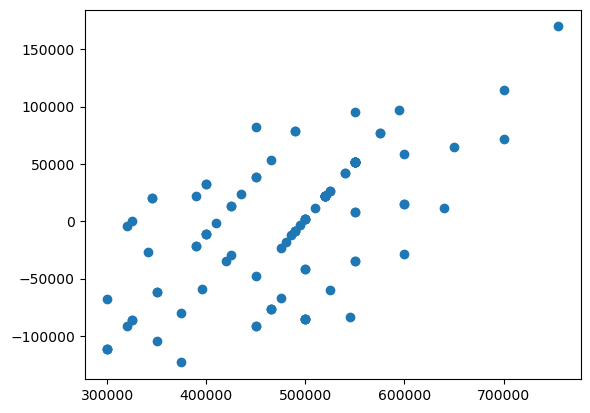

In [46]:
plt.scatter(y, res)
plt.show()

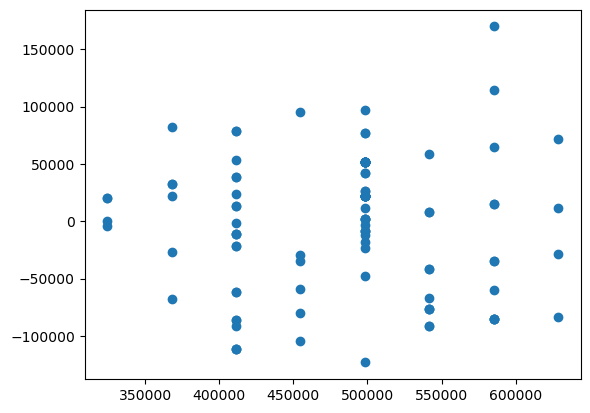

In [48]:
plt.scatter(pred, res)
plt.show()

In [47]:
stats.mstats.normaltest(res)

NormaltestResult(statistic=masked_array(data=[0.9025155984421415],
             mask=[False],
       fill_value=1e+20), pvalue=array([0.63682665]))

In [49]:
res_sq = res**2
mse = res_sq.mean()
mse

Residuals    3.276721e+09
dtype: float64

In [50]:
import math as math
rmse = math.sqrt(mse)
rmse

57242.651638126474